### **Load Environment variables from .env file**

In [1]:
from openai import AzureOpenAI
from dotenv import load_dotenv
import os
from IPython.display import display, HTML, JSON, Markdown, Image

load_dotenv()
GPT4o_API_KEY = os.getenv("GPT4o_API_KEY")
GPT4o_DEPLOYMENT_ENDPOINT = os.getenv("GPT4o_DEPLOYMENT_ENDPOINT")
GPT4o_DEPLOYMENT_NAME = os.getenv("GPT4o_DEPLOYMENT_NAME")


client = AzureOpenAI(
  azure_endpoint = GPT4o_DEPLOYMENT_ENDPOINT, 
  api_key=GPT4o_API_KEY,  
  api_version="2024-02-01"
)

In [2]:
def call_openAI(text):
    response = client.chat.completions.create(
        model=GPT4o_DEPLOYMENT_NAME,
        messages = text,
        temperature=0.0
    )
    return response.choices[0].message.content

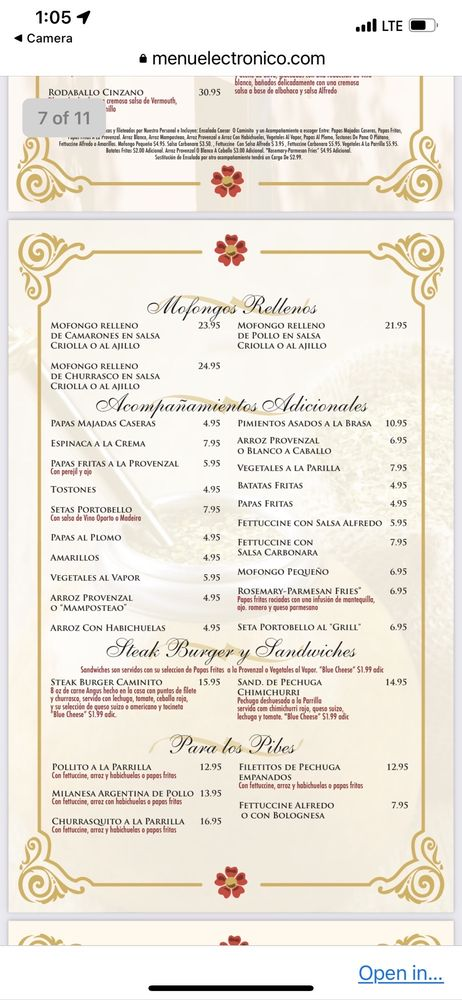

In [3]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

IMAGE_PATH = "./data/menu.jpg"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [4]:

messages=[
    {"role": "system", "content": "You are a helpful assistant that responds to users questions"},
    {"role": "user", "content": [
        {"type": "text", "text": "Are there any keto diet options in this menu?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
display(HTML(result))

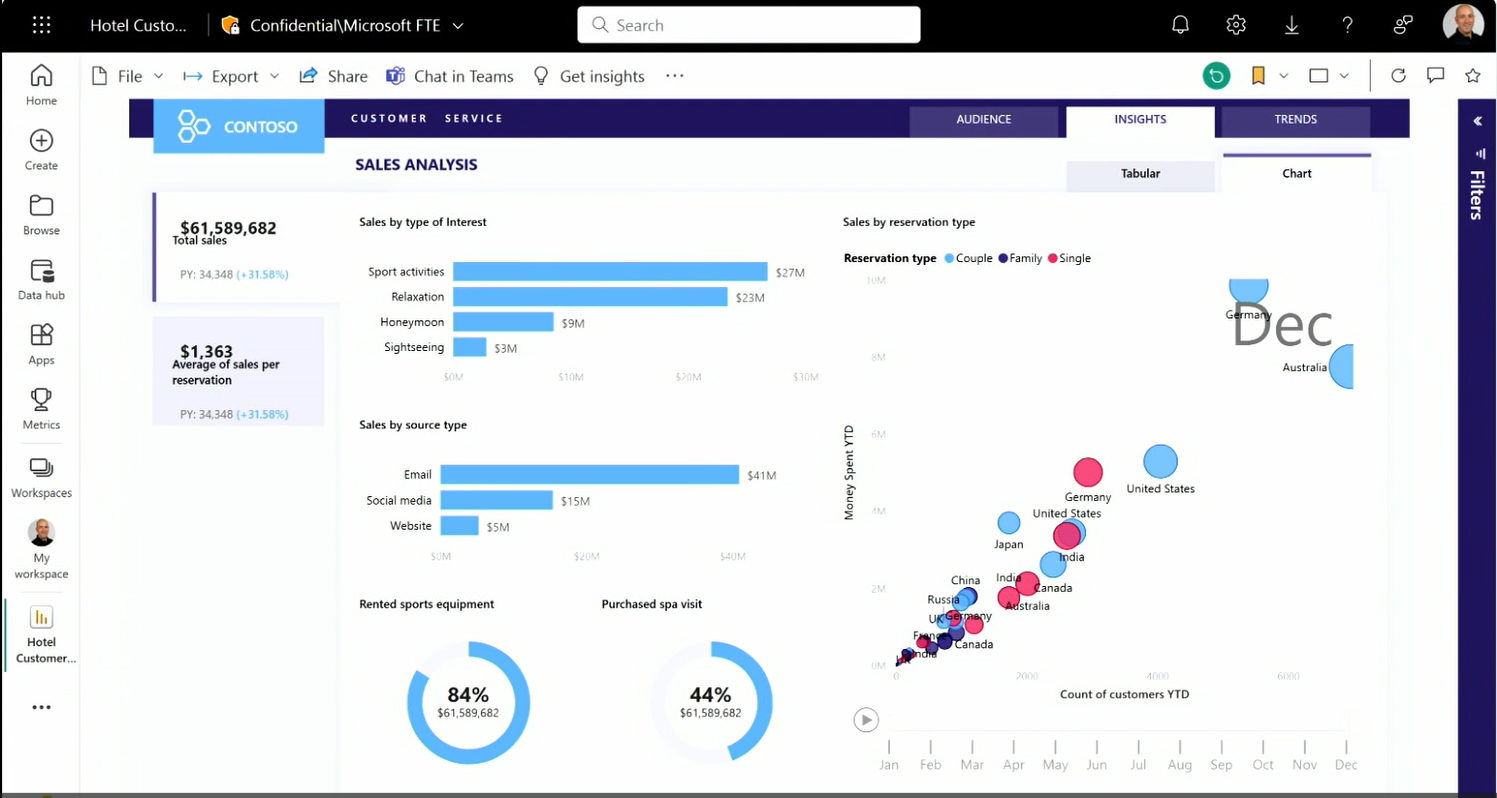

In [5]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

IMAGE_PATH = "./data/pbi.png"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [6]:

messages=[
    {"role": "system", "content": "You are a helpful assistant that responds to users questions"},
    {"role": "user", "content": [
        {"type": "text", "text": "How do I filter this to Canada?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
display(HTML(result))